# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [ ]:
#Let's load our data into a data frame 
df  = pd.read_csv("/Users/floriancharles/PycharmProjects/E-Cornell_Internship_project/airbnbListingsData.csv")
df.head()

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


In [7]:
# Let's get a little insight at what our numerical values are 
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [8]:
# Let's check for missing values
df.isnull().sum()

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

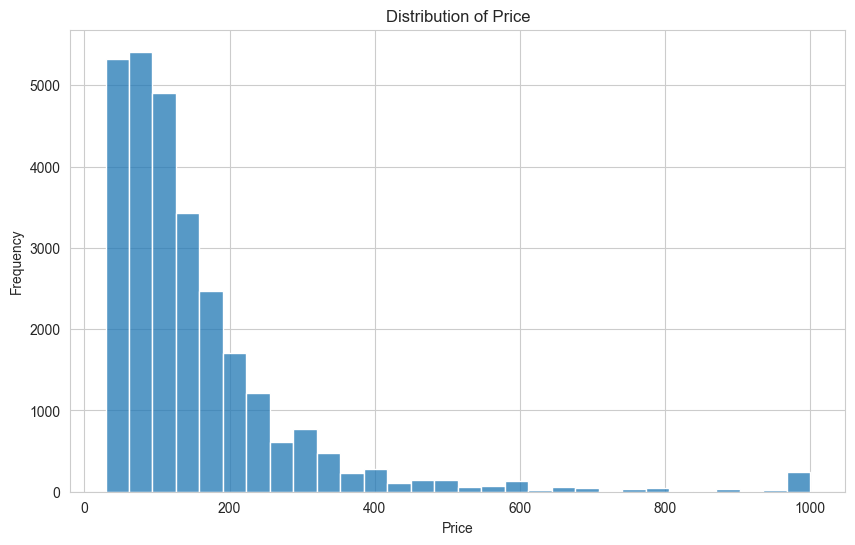

In [9]:
# Let's look at the distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Address outliers and perform winsorization 
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [26]:
# Let's drop all the colums that are not not necessary and should not be a feature 
columns_to_drop = ["price", "name", "description", "neighborhood_overview", "host_name", "host_location", "host_about", "neighbourhood_group_cleansed", "room_type"]
X = df.drop(columns_to_drop, axis=1)

# Preprocess amenities column using one-hot encoding
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(X['amenities'])
amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)
X = pd.concat([X, amenities_df], axis=1)
X.drop('amenities', axis=1, inplace=True)

# Handle missing values by replacing it with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Target variable
y = df["price"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the model: {mse:.2f}")

# Decided to also use the RMSE since it punishes more heavily outliers and gives me back an result in the same range as my target variable 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error of the model: {rmse:.2f}")




Mean Squared Error of the model: 4365.56
Root Mean Squared Error of the model: 66.07


Analysis:
Based on the model we're able to successfully predict the prices of the houses with the model being of by an average of 66$.

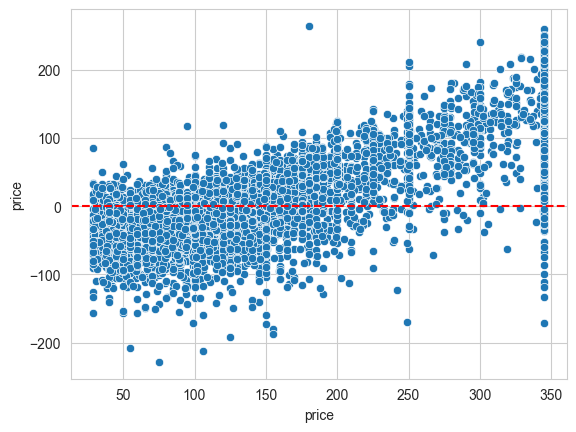

In [13]:
# Let's visualize the residuals of the error 

test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axline(xy1=(min(y_test), 0), xy2=(max(y_test), 0), color="red", ls="--")
plt.show()


From the graph, it is evident that the majority of residual errors dots align closely within the vicinity of the mean, depicted by the red dashed line, while there are only a few outlier points.

In [14]:
# Let's try using polynomial Regression even tough the scatter plot shows kind of a linear relationship but I'm not really sure of it.
from sklearn.preprocessing import PolynomialFeatures

In [15]:
polymonial_convert = PolynomialFeatures(degree=2,include_bias=False)

In [16]:
polymonial_convert.fit(X)

PolynomialFeatures(include_bias=False)

In [17]:
poly_features = polymonial_convert.transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)


In [20]:
model2= LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [21]:
test_predictions = model2.predict(X_test)

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

In [23]:
print(rmse)

1026127.248324053


Analysis: Employing polynomial regression was overkill as the root mean square error (RMSE) significantly surpasses that of the linear regression model. This underscores the notion that increased model complexity does not invariably translate to enhanced predictive performance

In [28]:
# Let's do cross validation to see if we can improve the model

In [29]:
from sklearn.model_selection import cross_val_score

# Create a linear regression model (or any other model you prefer)
model = LinearRegression()

# Perform cross-validation with 5 folds and evaluate using negative MSE
num_folds = 5
neg_mse_scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate RMSE from negative MSE scores
rmse_scores = np.sqrt(-neg_mse_scores)

# Print the RMSE scores for each fold
print("RMSE scores for each fold:", rmse_scores)

# Calculate and print the mean RMSE score
mean_rmse = np.mean(rmse_scores)
print("Mean RMSE:", mean_rmse)


RMSE scores for each fold: [66.28290548 66.81853459 66.46692778 65.82651296 65.76719234]
Mean RMSE: 66.23241462946555


Analysis: The cross-validation results indicate that the model is not overfitting the training data as the RMSE scores for each fold are comparable to the RMSE score of the linear regression model.

In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create a list of tuples, where each tuple contains the model name and the corresponding model instance
models = [
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42))
]

# Loop through the models and fit, predict, and evaluate each one
for model_name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{model_name} RMSE:", rmse)


Random Forest RMSE: 54.23326752024823
Gradient Boosting RMSE: 55.32743049524615


Conclusion:
Based on the analysis conducted, we can draw the following conclusions:
The initial data exploration and preprocessing steps, such as addressing missing values and handling outliers, were essential for preparing the data for modeling since there was a ton of non-numerical values that wasn't necessary for our model.
The Linear Regression model provided reasonable predictive performance with an average RMSE of approximately 66$. This suggests that the model captured the underlying patterns in the data.
While polynomial regression was tested, it did not lead to an improvement in model performance and was deemed unnecessary for this specific problem.
Cross-validation confirmed the model's consistency in performance across different subsets of the data, providing a more reliable estimate of its generalization capabilities.
And by doing RandomForests and GradientBoosting we were able to improve the model by a little bit but not by much which is still good since we're not sacrificing the model being overfit to the training data.


In [32]:
#Let's save our model
import joblib

In [33]:
joblib.dump(model, "model.pkl")

['model.pkl']

In [34]:
classifier = joblib.load("model.pkl")